In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs

In [2]:
filepath = ("/volumes/TOSHIBA/MIT/b.e13.Bi1850C5.f19_g16.itrace.ice_ghg_orb_wtr.cam.h0.PRECT.nc")

In [3]:
test = xr.open_dataset(filepath)*86400000
test

<xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, time: 95988)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 1001-02-01 00:00:00 ... 8999-12-11 00:00:00
Data variables:
    precip   (time, lat, lon) float64 0.01243 0.01243 0.01243 ... 0.1809 0.1809

In [11]:
min_lat = -40
max_lat = 40
min_lon = 30
max_lon = 120

In [4]:
def seasonal_means(test):
    month_length = test.time.dt.days_in_month
    seasonal_sst = ((test*month_length).resample(time = 'QS-DEC').sum() / 
                month_length.resample(time ='QS-DEC').sum())
    mam = seasonal_sst.sel(time = seasonal_sst.time.dt.season=='MAM')
    jja = seasonal_sst.sel(time = seasonal_sst.time.dt.season=='JJA')
    son = seasonal_sst.sel(time = seasonal_sst.time.dt.season=='SON')
    djf = seasonal_sst.sel(time = seasonal_sst.time.dt.season=='DJF')
    
    annual = test.groupby('time.year').mean(dim='time')
    
    return mam, jja, son, djf, annual

In [5]:
mam, jja, son, djf, annual = seasonal_means(test)

In [10]:
djf['time'] = np.arange(19,11,-0.001)
djf

<xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, time: 8000)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) float64 19.0 19.0 19.0 19.0 19.0 ... 11.0 11.0 11.0 11.0
Data variables:
    precip   (time, lat, lon) float64 0.01243 0.01243 0.01243 ... 0.1809 0.1809

In [27]:
djf_new = djf.sel(time=slice(17,15),lon=slice(min_lon, max_lon), lat=slice(min_lat,max_lat)).mean(dim='time')

In [28]:
djf_old = djf.sel(time=slice(19,18),lon=slice(min_lon, max_lon), lat=slice(min_lat,max_lat)).mean(dim='time')

In [29]:
djf_diff = djf_new - djf_old

/var/folders/8f/8f6cypmn48x3j6q963chv0w00000gn/T/ipykernel_12604/948711162.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot(111, projection=ccrs.PlateCarree())


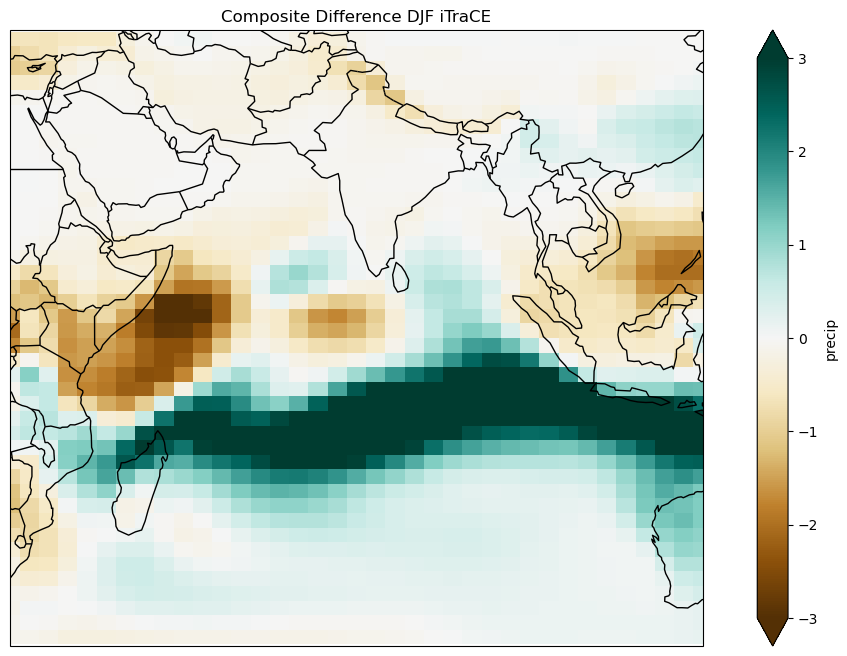

In [35]:
domain = [min_lon, max_lon, min_lat, max_lat] # for just indian (longitude start, longitude end, latitude start, latitude end)

fig, ax = plt.subplots(1,1, figsize=(14,8))

#Row 1, Col.1
ax1=plt.subplot(111, projection=ccrs.PlateCarree())

ax1.add_feature(cfeature.COASTLINE, zorder=2)
ax1.add_feature(cfeature.BORDERS, zorder=2)

# rest of this is for tick formatting
#ax1.set_xticks(np.arange(-180, 180, 10), crs=ccrs.PlateCarree())
#ax1.set_yticks(np.arange(-90, 90, 10), crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter()
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)

# making map with data
im = djf_diff.precip.plot(transform=ccrs.PlateCarree(), vmin = -3, vmax = 3, cmap='BrBG')

plt.title('Composite Difference DJF iTraCE', fontsize=12) 
ax1.set_extent(domain, crs=ccrs.PlateCarree())
